<a href="https://colab.research.google.com/github/akifkashif/Netflix-Movies-and-TV-shows-Clustering-Project/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [175]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, KFold

import warnings
warnings.filterwarnings('ignore')


In [95]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [97]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [98]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


***There are missing values in columns Director, Cast, Country, Rating***.

In [100]:
df.shape

(7787, 12)

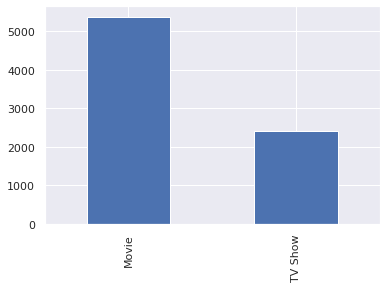

In [102]:
df['type'].value_counts().plot(kind='bar')

***There are more number of movies in Netflix than TVshows.***

In [103]:
df['title'].nunique()

7787

In [104]:

Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates
     

The Dublicate Values in Dataframe: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


***There are no duplicate values in the dataframe.***

In [105]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

***There are null values in director, cast, country, release year, rating columns.***

In [106]:
df['country'] = df['country'].fillna(df['country'].mode().values[0])

In [107]:
df['cast'].fillna(value='No cast',inplace=True)

In [108]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [109]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      5394 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


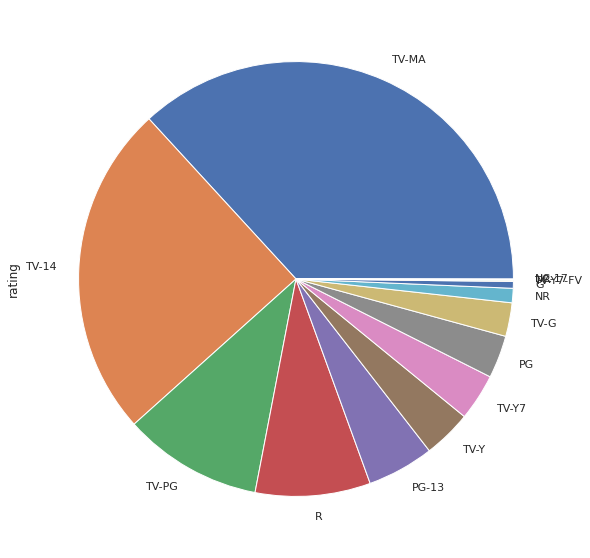

In [112]:
df['rating'].value_counts().plot(kind='pie', figsize = (10,10))

***Highest number of ratings are TV-MA and TV-14 from Movie and TV Show.***

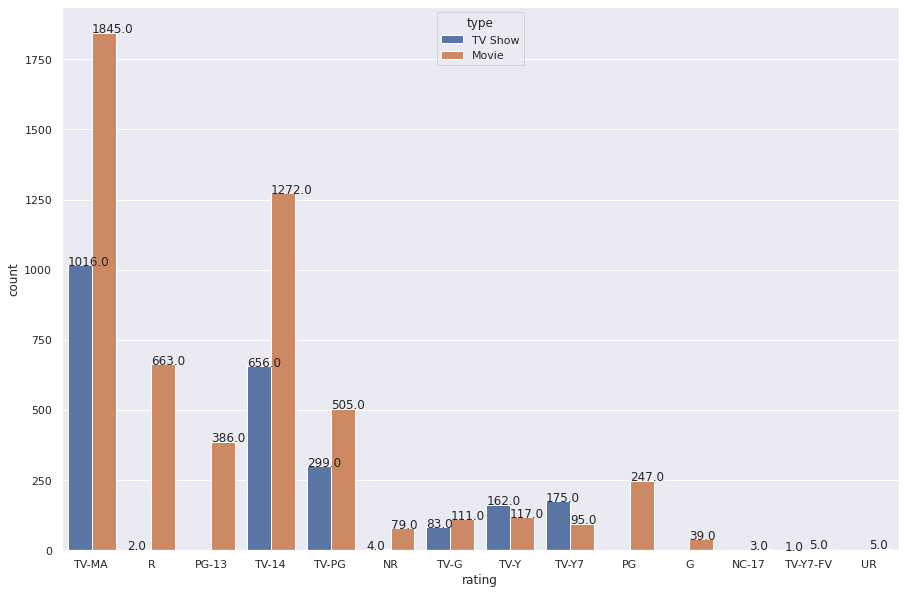

In [113]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(data = df, x = 'rating', hue = 'type',)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

***There are more TV-MA(Mature Audience) content on Netflix followed by TV-14(14+) and TG-PG(Parental Guidance) compared to other content . There are no TV shows with content based on PG-13, PG, G, UR etc,. These TV Show stats might change in the future where more versatile content will be filmed.***

In [115]:
df['Audience_AgeGroup']  = df['rating'].apply(lambda x:'Millennials' if x in ['TV-MA','NR','R','UR','NC-17'] else 'GenZ' if x in ['TV-PG','TV-Y7-FV', 'TV-Y7', 'PG','TV-14','PG' ]  else 'Kids')

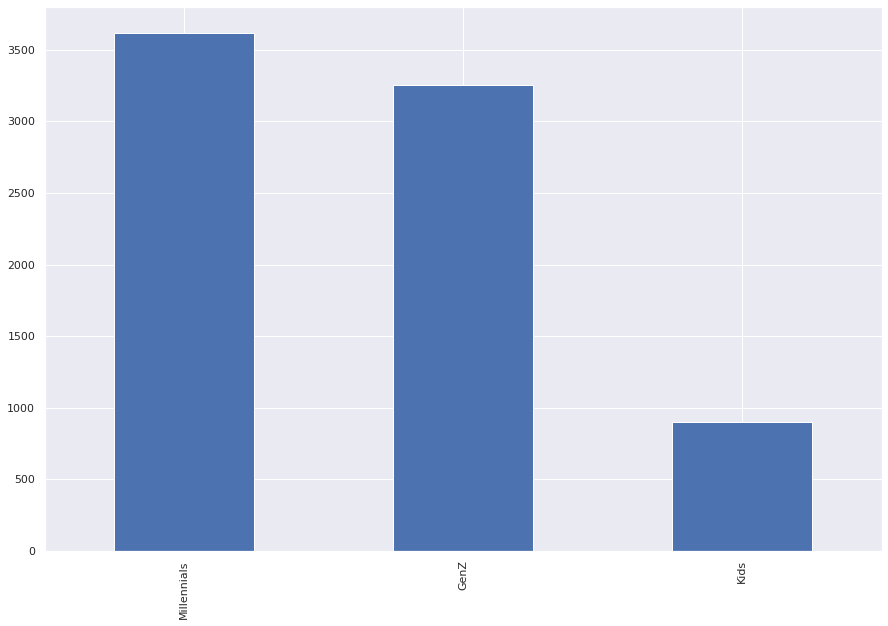

In [116]:
df['Audience_AgeGroup'].value_counts().plot(kind='bar')

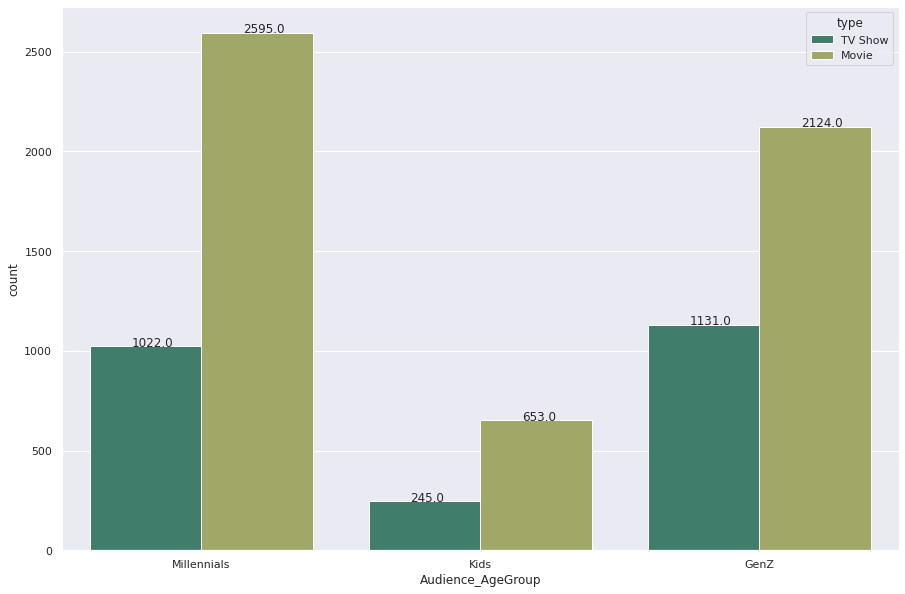

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(data = df, x = 'Audience_AgeGroup', hue = 'type',palette = 'gist_earth')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

***Netflix has highest content count for individuals of age group Millenials and lowest content for Kids. The database contains wide-reaching number of movies for Millenials and fairly equivalent number of TV Shows for both Millennial and GenZ age groups.***

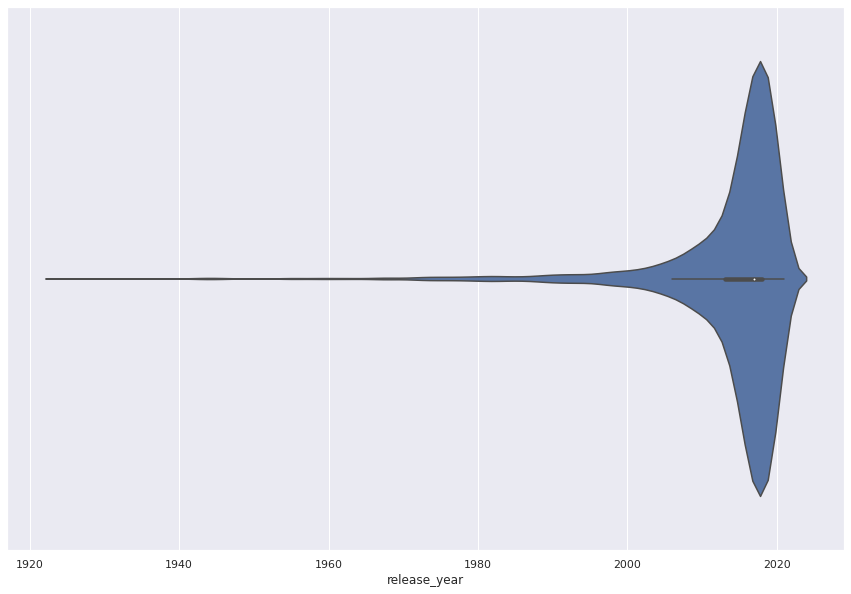

In [25]:
sns.violinplot(data = df, x = 'release_year', hue = 'type')



***1.   Highest Number of movies and TV shows were produced in the years   2015-2019. ***

***2.   Because of the digitization of the world, people are just one click away from streaming content so majority of the audience in these periods were more interested in Netflix so producers preferred to release their content on netflix. ***

***3.   People started taking interest in OTT platforms from 2017 and as Netflix is the largest OTT services provider so theres a peak from that period.***



In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Audience_AgeGroup
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Millennials
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Millennials
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Millennials
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Kids
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Kids


In [27]:
df.country.value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

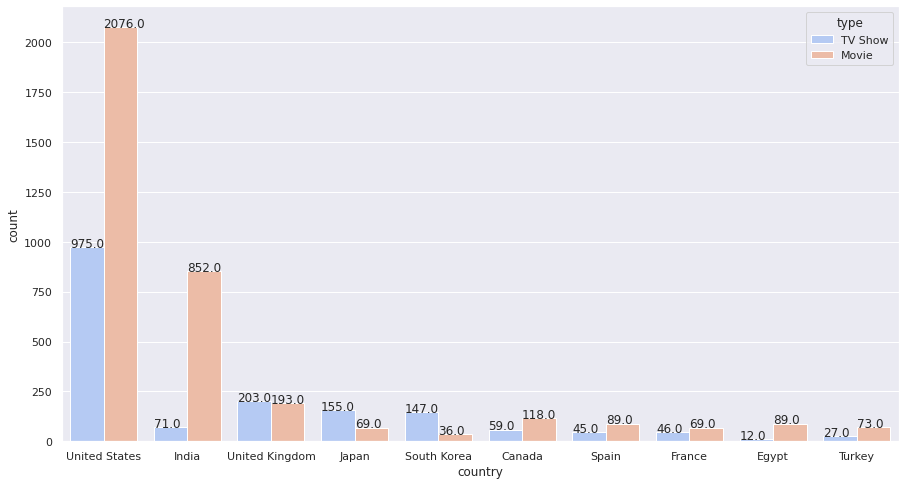

In [28]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.countplot(data = df, x='country',palette="coolwarm",order=df['country'].value_counts().index[0:10],hue='type', )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

***This countplot shows that the country US has significant amount of both movies and TV shows at netflix and coming at second place, India has an inconsistent distribution between movie and TV show with movie being higher.***

In [117]:
#Extracting month from date added column in the dataset
df['month'] = pd.DatetimeIndex(df['date_added']).month


In [118]:
#COnverting month number to month name
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [119]:
df1 = df.copy()

In [120]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Audience_AgeGroup,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Millennials,Aug
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Millennials,Dec
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Millennials,Dec
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Kids,Nov
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Kids,Jan


In [121]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


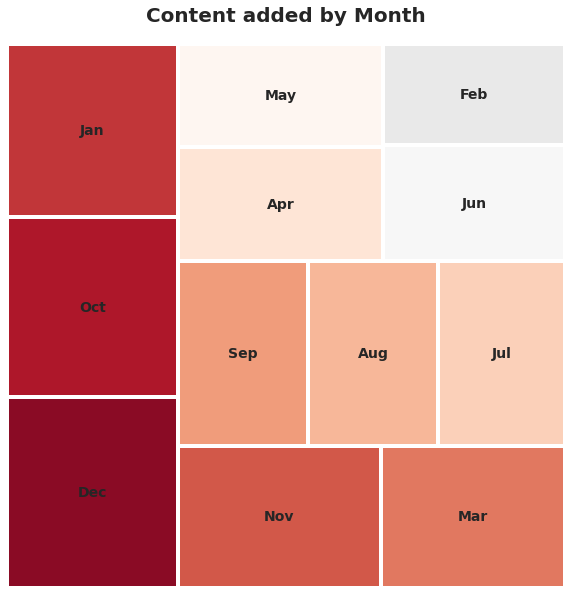

In [122]:
# Making a TreeMap
import squarify
y = df.month.value_counts()
fig = plt.figure(figsize = (10,10))
squarify.plot(sizes = y.values , label = y.index , color = sns.color_palette('RdGy' , n_colors = 20),
             linewidth = 4 , text_kwargs = {'fontsize' : 14 , 'fontweight' : 'bold'})
plt.title('Content added by Month' , position = (0.5 , 1.0 + 0.03) , fontsize = '20' , fontweight = 'bold')
plt.axis('off')
plt.show()

***December was the month were the most amount of content was added on Netflix followed by October***.

In [123]:

df.duration.value_counts().to_frame()

,duration
1 Season,1606
2 Seasons,378
3 Seasons,183
90 min,136
93 min,131
...,...
182 min,1
224 min,1
37 min,1
233 min,1


Research says that the average duration of a single episode of Netflix is 55 minutes and the average number of episodes in a single season of a show is 10.

In [124]:
def min_check(x):
  if ('Seasons' in x) | ('Season' in x):
    y = int(x[0])*550
    y = str(y) +' ' + 'min'
    return y
  else:
    return x

In [125]:
def interger_min(x):
  if 'min' in str(x):
    y = x.replace(' min', '')
    y = int(y)
    return y
  else:
    return x
     

In [126]:
df1['duration_in_min2'] = df1['duration'].apply(lambda x: min_check(x))

In [127]:
df1['duration_in_min'] = df1['duration_in_min2'].apply(lambda x: interger_min(x))

In [128]:
df1.drop(columns = (['duration','duration_in_min2']), inplace =  True)

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            7770 non-null   object
 1   type               7770 non-null   object
 2   title              7770 non-null   object
 3   director           5394 non-null   object
 4   cast               7770 non-null   object
 5   country            7770 non-null   object
 6   date_added         7770 non-null   object
 7   release_year       7770 non-null   int64 
 8   rating             7770 non-null   object
 9   listed_in          7770 non-null   object
 10  description        7770 non-null   object
 11  Audience_AgeGroup  7770 non-null   object
 12  month              7770 non-null   object
 13  duration_in_min    7770 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 1.1+ MB


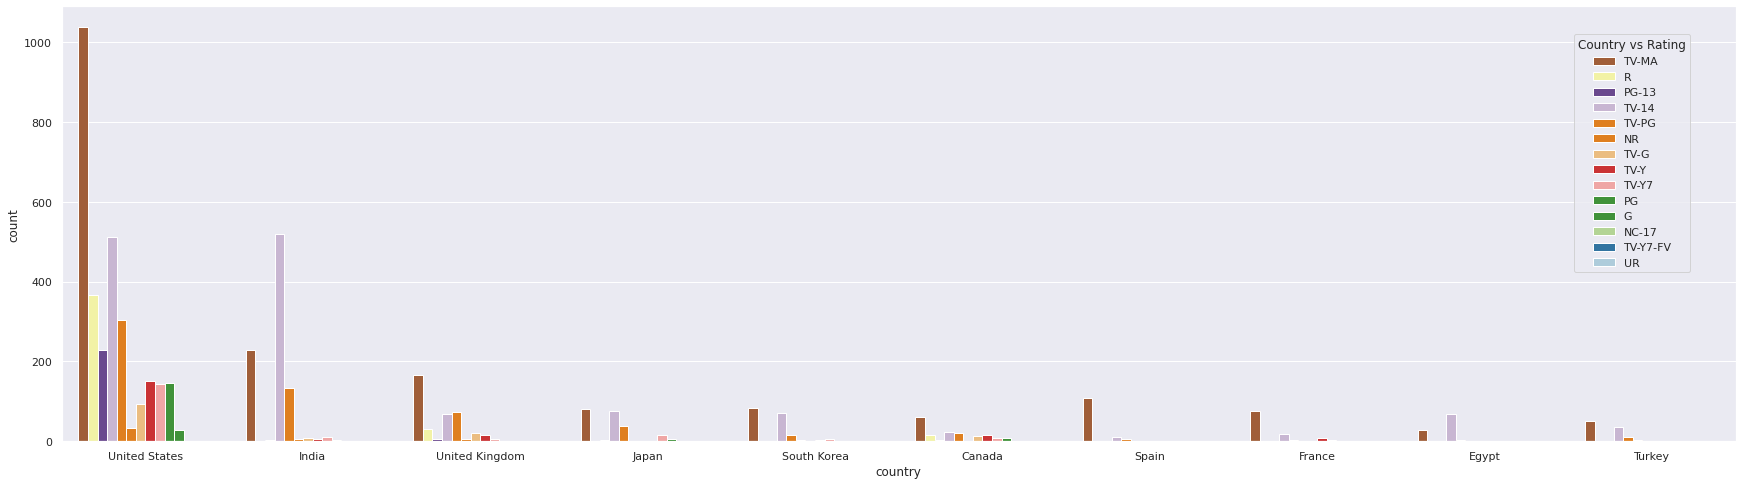

In [130]:

sns.set(rc={'figure.figsize':(30,8)})
g = sns.countplot(data = df, x='country',palette="Paired_r",order=df['country'].value_counts().index[0:10],hue = 'rating', )
sns.move_legend(g, "upper left", bbox_to_anchor=(.90, .95), title='Country vs Rating')

***Here we can see the distribution of content is highest in US reason being there are myriad of cultures thats why US produces variety of content on Netflix. As the total content count of a country decreases, the range of content cease to exist.***

In [131]:
df.director.value_counts().to_frame()

,director
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
...,...
Vibhu Virender Puri,1
Lucien Jean-Baptiste,1
Jason Krawczyk,1
Quinn Lasher,1


In [132]:
df2 = df.copy()

In [133]:
df2.dropna(subset =(['director']), inplace =  True )

Text(0.5, 1.0, 'Ratings with respect to Directors')

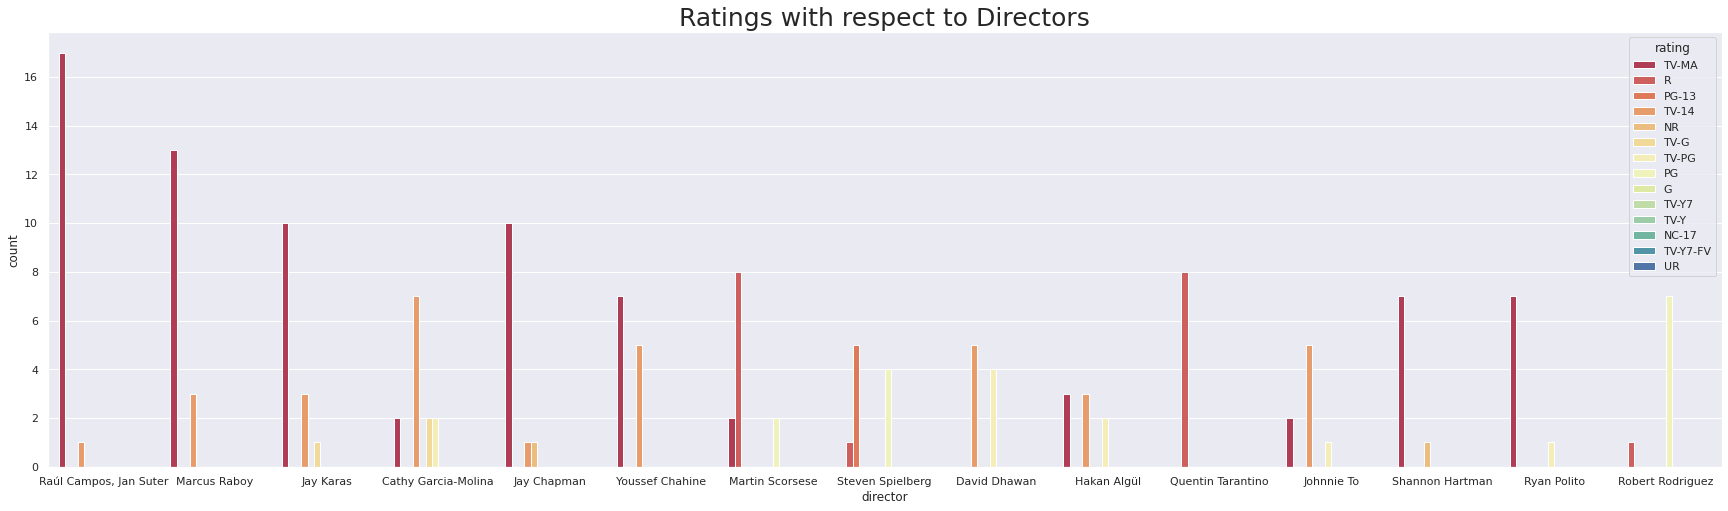

In [134]:
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.countplot(data = df2, x='director',palette="Spectral",order=df['director'].value_counts().index[0:15],hue='rating')
plt.title('Ratings with respect to Directors',fontsize = 25  )

***Majority of directors had their content rated as TV-MA(Mature Audience). As directors specialize in specific type of content, there aren't many directors who produce Movies or TV Shows with multiple ratings. ***

In [135]:
df_duration = df1.groupby('type').count()['duration_in_min']

In [136]:
df_duration

type
Movie      5372
TV Show    2398
Name: duration_in_min, dtype: int64

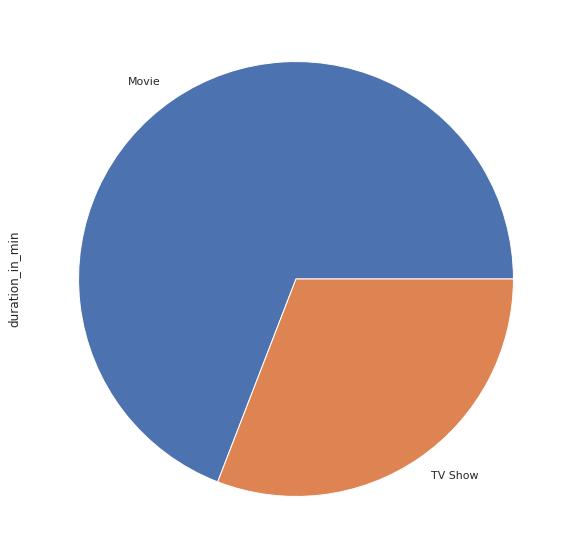

In [137]:
df_duration.plot(kind='pie', figsize = (10,10))

***The duration of content on Movie is signficantly higher than that of TV Show.  ***

***Most of the content on Netflix has a duration of 550 minutes followed by a duration of 1100 minutes.***

In [138]:

tv_shows = df1[df1['type'] == 'TV Show']
movies = df1[df1['type'] == 'Movie']

In [139]:
duration_tv_shows = tv_shows['duration_in_min'].reset_index()
duration_movies = movies['duration_in_min'].reset_index()

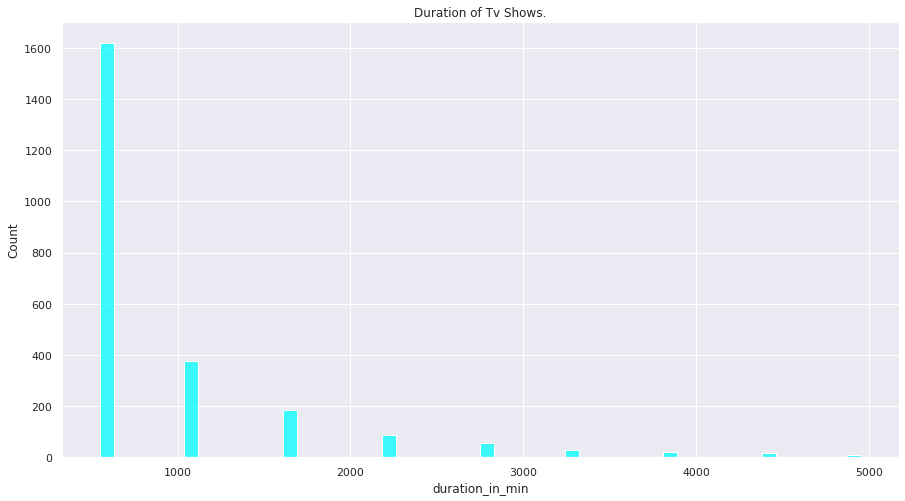

In [140]:

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration_in_min'], color= 'Cyan')
plt.title('Duration of Tv Shows.')
plt.show()
     

***Most of the TV Show content duration is around 500 followed by 1000 minutes. 550 minutes comprise of single season and two seasons in 1000 minutes. Most of Shows may have been stopped producing halfway due to lack of finanicial resources and viewership.***

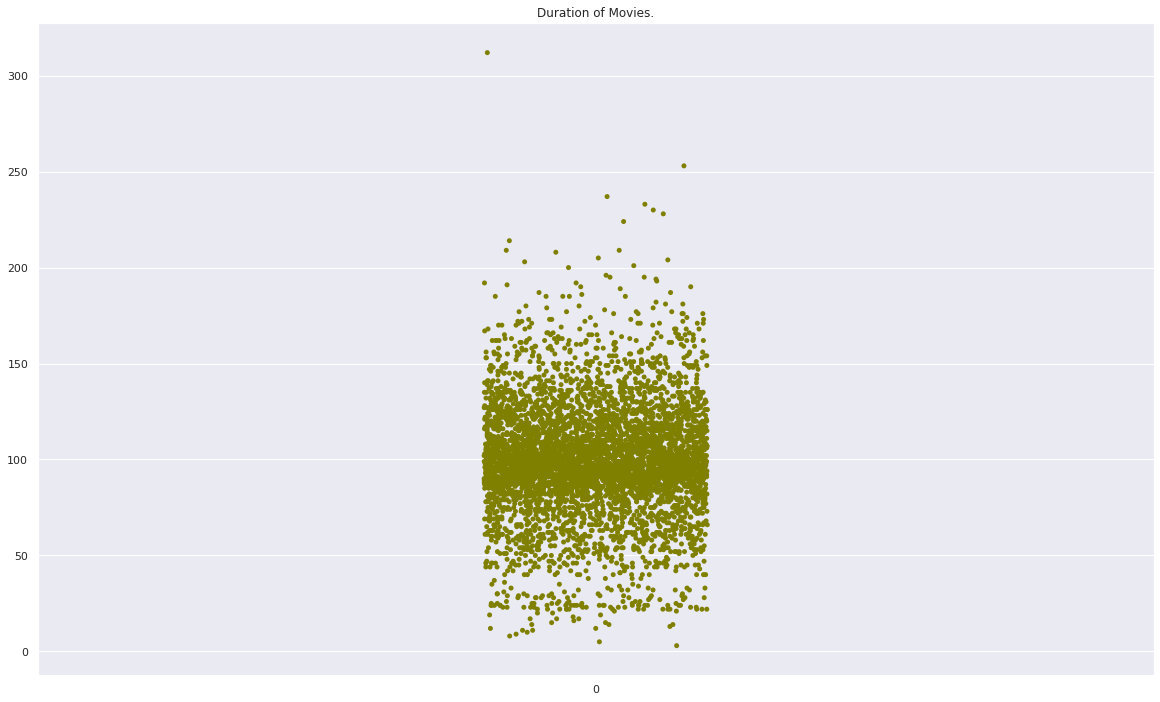

In [53]:
plt.figure(figsize=(20,12))
sns.set(style="darkgrid")
sns.stripplot(data=duration_movies['duration_in_min'], color='Olive')
plt.title('Duration of Movies.')
plt.show()

***As we can see most of movies are around 100 to 120 minute mark which accounts to around 2hrs.Directors prefer to tell the story in 2hrs because it is the ideal period of time to getting into crucial details and not dive too much into intricacies. Most of the people find it tiring if its a long movie.***

In [54]:
df1.listed_in.unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [141]:
genres = ",".join(df1['listed_in']).split(",")

In [142]:
len(set(genres))

73

***There are 73 unique genres on Netflix with multiple combinations for a content.***

In [57]:
df1.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,Audience_AgeGroup,month,duration_in_min
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Millennials,Aug,2200
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Millennials,Dec,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Millennials,Dec,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Kids,Nov,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,Dramas,A brilliant group of students become card-coun...,Kids,Jan,123
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Millennials,Jul,550
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Millennials,Jun,95
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,Dramas,After one of his high school students attacks ...,Millennials,Nov,119
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",GenZ,Apr,118
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,Millennials,Dec,143


In [143]:
from collections import Counter
genre_count = Counter(genres)
type(genre_count)

collections.Counter

In [144]:
genre_count = sorted(dict(genre_count).items(), key=lambda x: x[1])

In [145]:

type(genre_count)

list

In [146]:
for i in genre_count:
  y = i[0]
  print(y)

Sports Movies
TV Sci-Fi & Fantasy
LGBTQ Movies
Spanish-Language TV Shows
Romantic Movies
 Classic & Cult TV
 Stand-Up Comedy
TV Horror
Sci-Fi & Fantasy
TV Shows
Cult Movies
Music & Musicals
Anime Features
 Stand-Up Comedy & Talk Shows
Classic & Cult TV
Independent Movies
 Classic Movies
Romantic TV Shows
 Children & Family Movies
Stand-Up Comedy & Talk Shows
 Documentaries
TV Action & Adventure
 Anime Features
 Cult Movies
Thrillers
 TV Thrillers
Movies
 Kids' TV
 Faith & Spirituality
 Crime TV Shows
 TV Horror
 Teen TV Shows
TV Dramas
 Horror Movies
 TV Sci-Fi & Fantasy
Classic Movies
 Science & Nature TV
 LGBTQ Movies
 TV Mysteries
Reality TV
TV Comedies
 TV Action & Adventure
International Movies
 Reality TV
 Spanish-Language TV Shows
Anime Series
 Korean TV Shows
 Docuseries
Docuseries
 Sports Movies
 Sci-Fi & Fantasy
British TV Shows
Horror Movies
 Music & Musicals
 Romantic TV Shows
Stand-Up Comedy
Kids' TV
Crime TV Shows
 Comedies
 TV Comedies
 Thrillers
Children & Family Movies

In [147]:
names = []
values = []
for i in genre_count:
  names.append(i[0])
  values.append(i[1])

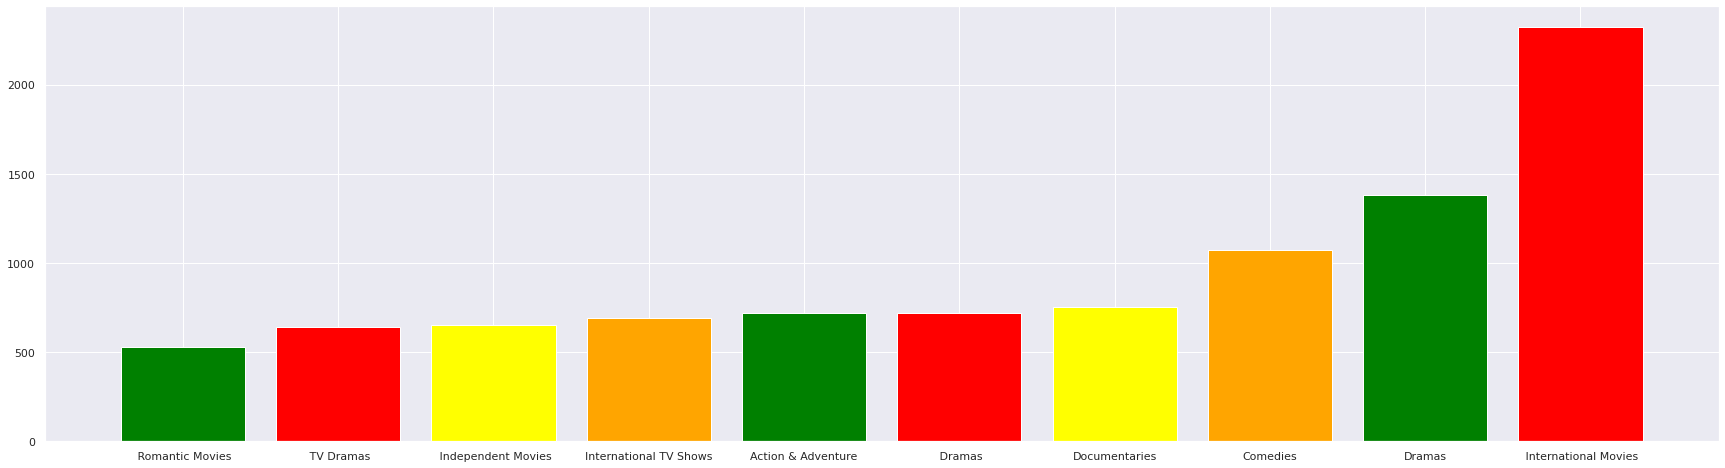

In [148]:
color=['green','red', 'yellow', 'orange']
plt.bar(names[-10:],values[-10:], color = color)
plt.show()

***International Movies is the most popular genre followed by Dramas on Netflix. The reason might be that the content was filmed outside of U.S or was filmed by third-party production studios.***

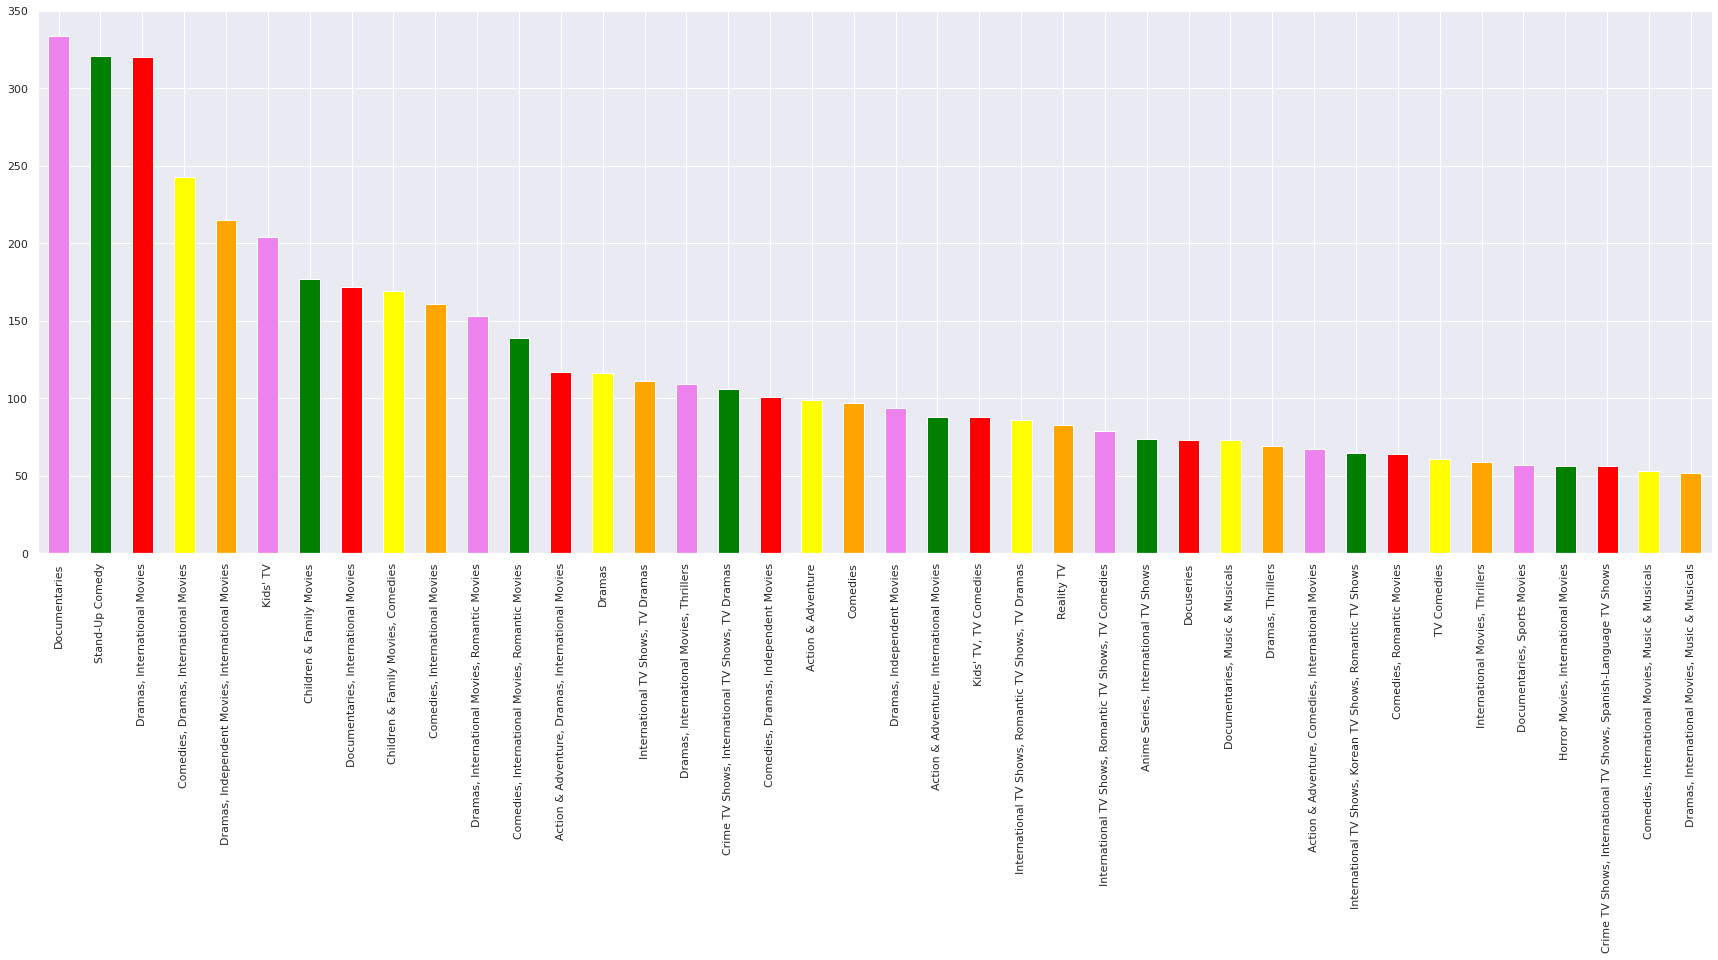

In [149]:
color=[ 'violet', 'green', 'red', 'yellow', 'orange']
df1.listed_in.value_counts()[0:40].plot(kind = 'bar', figsize = (30,10),color=color)

***Top 40 genres of content across Netflix. Media count for  Documentaries, Stand-Up Comedy, Dramas and International Movies was the highest. People are more inclined towards documentaries because it has knowledgeable content and its a fun way to learn and on the other hand Stand-Up Comedy is a form of stress buster for the general audience***

In [150]:
data = df1[['title']]
data['Filtered_data'] = (df1['description'] + ' ' + df1['listed_in']).astype(str)
data.set_index('title', inplace = True)
data.head()

,Filtered_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [151]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [152]:
data['Filtered_data'] = data['Filtered_data'].apply(remove_punctuation)
data.head(10)

,Filtered_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,When an army recruit is found dead his fellow ...
9,In a postapocalyptic world ragdoll robots hide...
21,A brilliant group of students become cardcount...
46,A genetics professor experiments with a treatm...
122,After an awful accident a couple admitted to a...
187,After one of his high school students attacks ...
706,When a doctor goes missing his psychiatrist wi...


In [153]:

import nltk
nltk.download('stopwords')
     


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:

# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [155]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [156]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [157]:
data['Filtered_data'] = data['Filtered_data'].apply(stopwords)
data.head(10)

,Filtered_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,devastating earthquake hits mexico city trappe...
23:59,army recruit found dead fellow soldiers forced...
9,postapocalyptic world ragdoll robots hide fear...
21,brilliant group students become cardcounting e...
46,genetics professor experiments treatment comat...
122,awful accident couple admitted grisly hospital...
187,one high school students attacks dedicated tea...
706,doctor goes missing psychiatrist wife treats b...


In [158]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['Filtered_data'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [159]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_before_stem = vocab_bef_stem.sort_values(ascending=False)

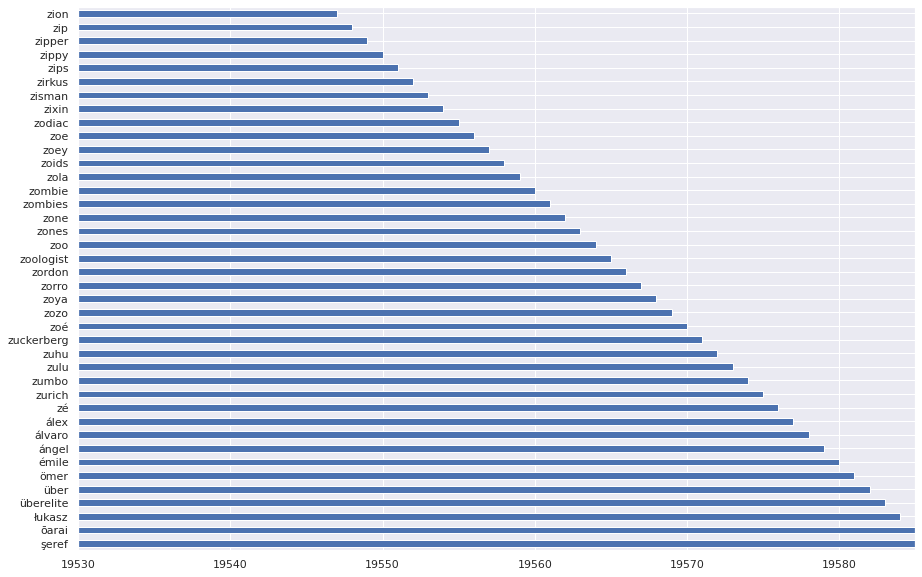

In [164]:
top_vacab = vocab_before_stem.head(40)
top_vacab.plot(kind = 'barh', figsize = (15,10),xlim = (19530, 19585))

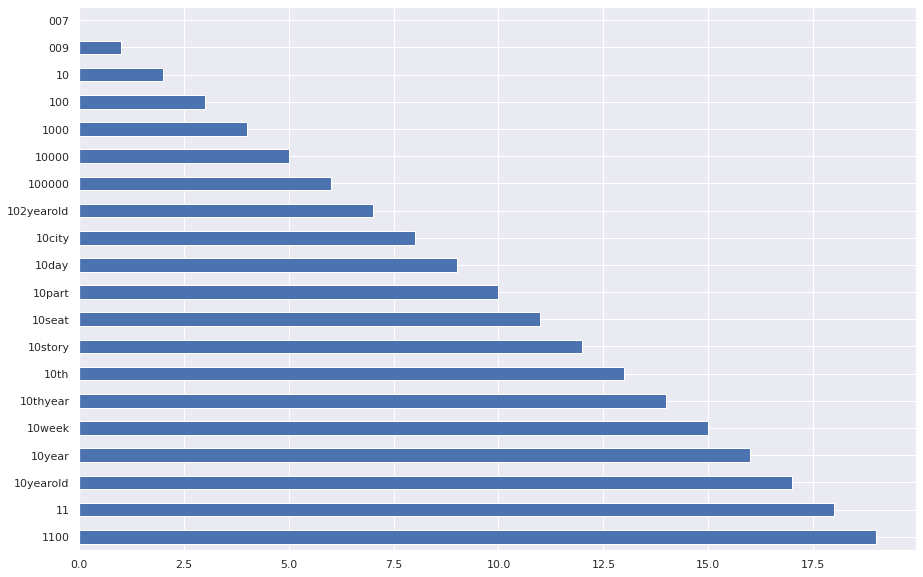

In [165]:
top_vacab = vocab_before_stem.tail(20)
top_vacab.plot(kind = 'barh', figsize = (15,10),)

In [166]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [167]:
data['Filtered_data'] = data['Filtered_data'].apply(stemming)
data.head(10)

,Filtered_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...
23:59,armi recruit found dead fellow soldier forc co...
9,postapocalypt world ragdol robot hide fear dan...
21,brilliant group student becom cardcount expert...
46,genet professor experi treatment comatos siste...
122,aw accid coupl admit grisli hospit separ must ...
187,one high school student attack dedic teacher t...
706,doctor goe miss psychiatrist wife treat bizarr...


In [168]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['Filtered_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

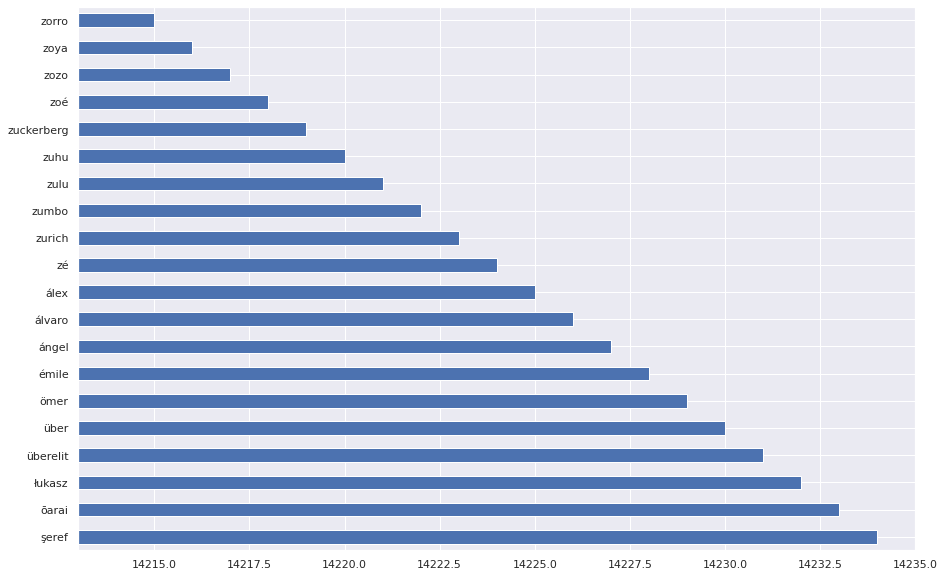

In [169]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(15,10),xlim = (14213, 14235))


In [170]:
data['Filtered_data']= data['Filtered_data'].apply(lambda x: x.lower())

In [171]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [172]:
data['length_of_description_and_listed_IN'] = data['Filtered_data'].apply(length)
data.head(10)

,Filtered_data,length_of_description_and_listed_IN
title,,
3%,futur elit inhabit island paradis far crowd sl...,123
7:19,devast earthquak hit mexico citi trap survivor...,106
23:59,armi recruit found dead fellow soldier forc co...,126
9,postapocalypt world ragdol robot hide fear dan...,133
21,brilliant group student becom cardcount expert...,105
46,genet professor experi treatment comatos siste...,131
122,aw accid coupl admit grisli hospit separ must ...,93
187,one high school student attack dedic teacher t...,170
706,doctor goe miss psychiatrist wife treat bizarr...,118


In [173]:

#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(data['Filtered_data'])
X_tfidf.shape

(7770, 5000)

In [187]:
from sklearn.decomposition import PCA
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X)
X = pca_tuned.transform(X)
X.shape

(7770, 3100)

Text(0, 0.5, 'WCSS')

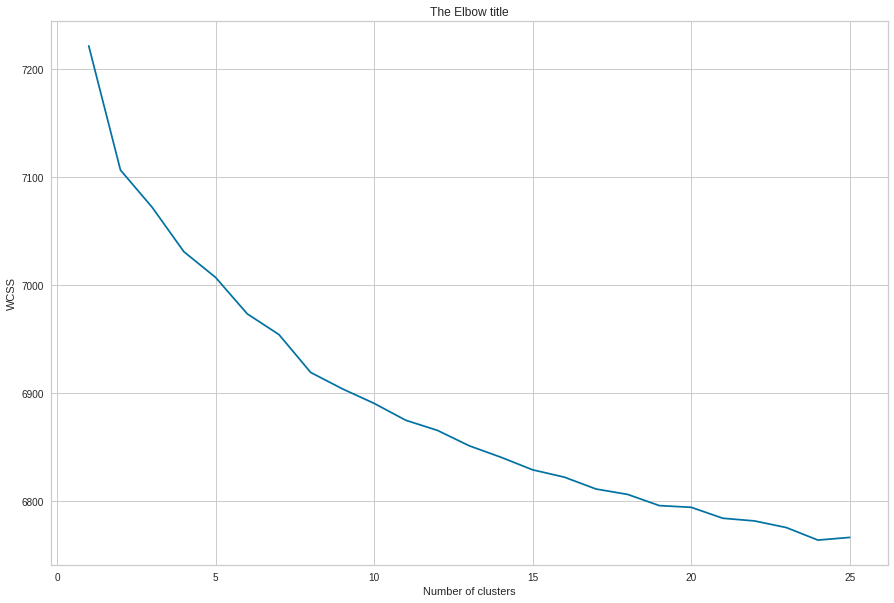

In [198]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,26):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,26)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

For n_clusters = 2 The average silhouette_score is : 0.011523951632272928
For n_clusters = 3 The average silhouette_score is : 0.013480972838431996
For n_clusters = 4 The average silhouette_score is : 0.013318134031655708
For n_clusters = 5 The average silhouette_score is : 0.012623580088080823
For n_clusters = 6 The average silhouette_score is : 0.012538298385978032
For n_clusters = 7 The average silhouette_score is : 0.016089647434188444
For n_clusters = 8 The average silhouette_score is : 0.014918902469615672
For n_clusters = 9 The average silhouette_score is : 0.014039821528622353
For n_clusters = 10 The average silhouette_score is : 0.015570466990240875
For n_clusters = 11 The average silhouette_score is : 0.015404957184505965
For n_clusters = 12 The average silhouette_score is : 0.0162493422932415
For n_clusters = 13 The average silhouette_score is : 0.016153179572587842
For n_clusters = 14 The average silhouette_score is : 0.011675674275808982
For n_clusters = 15 The average sil

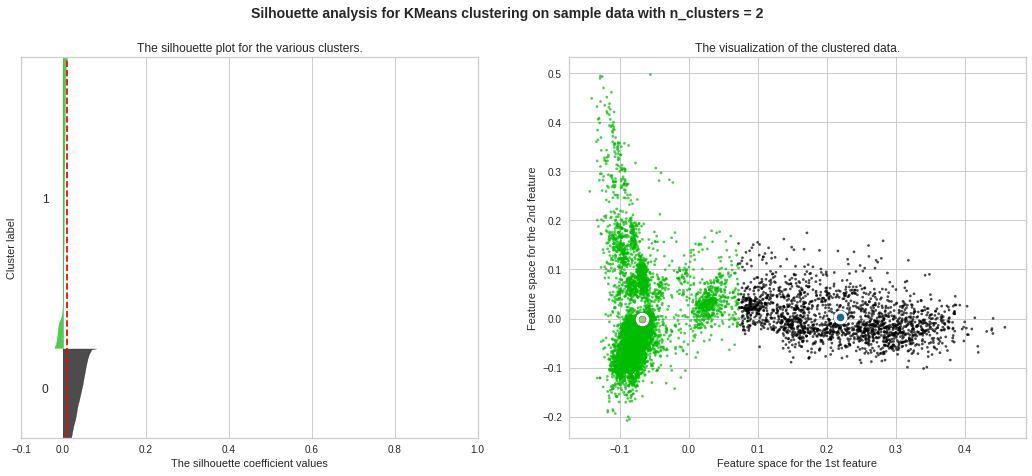

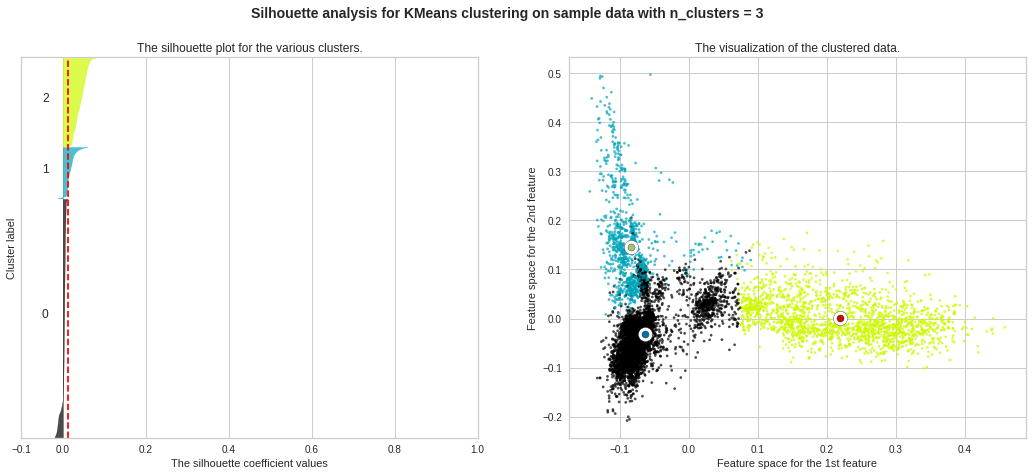

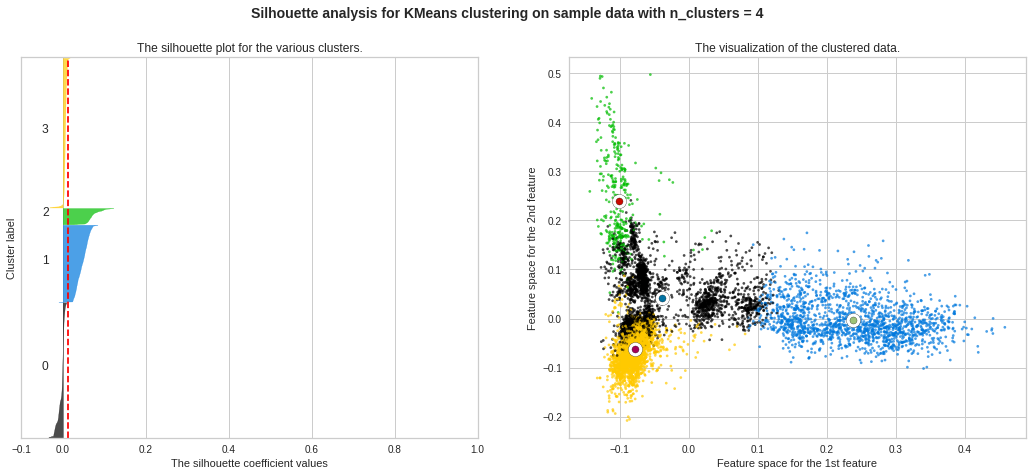

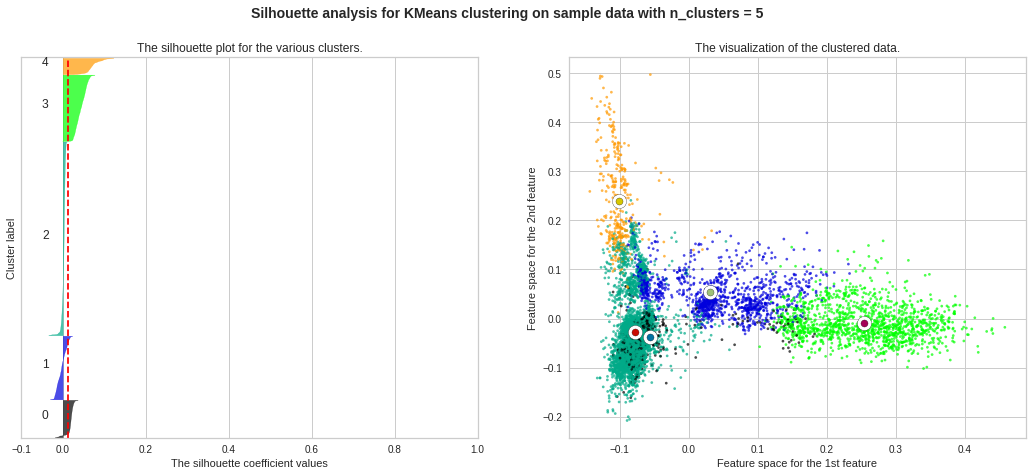

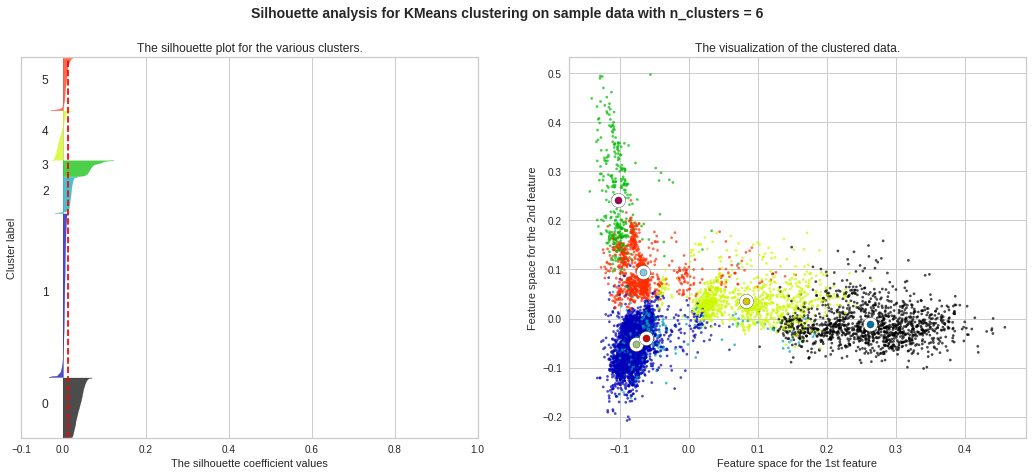

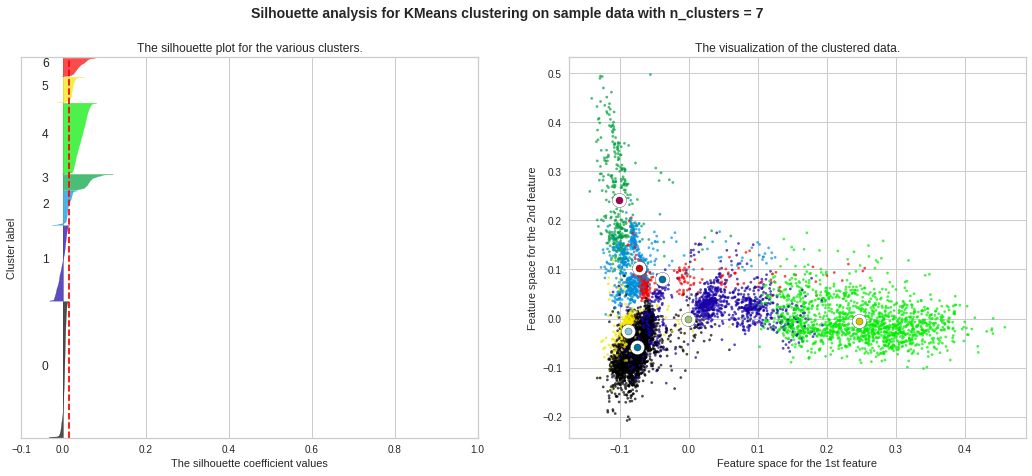

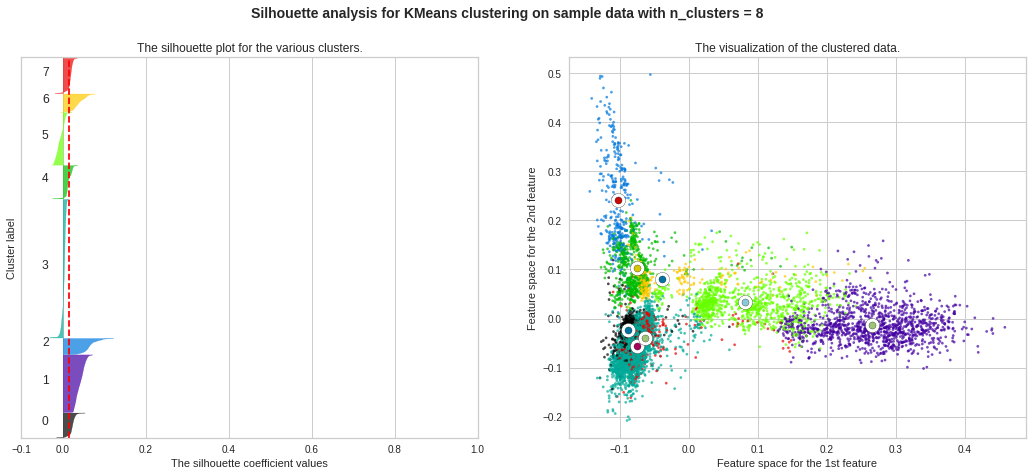

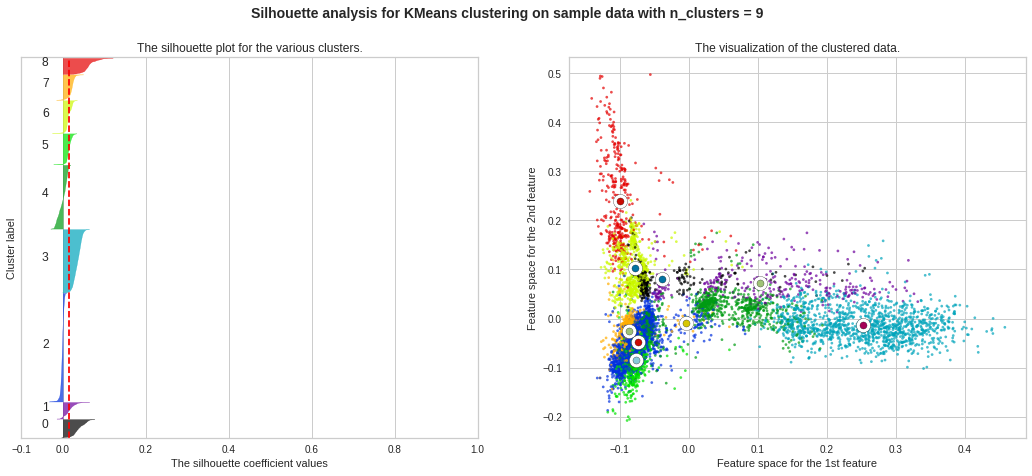

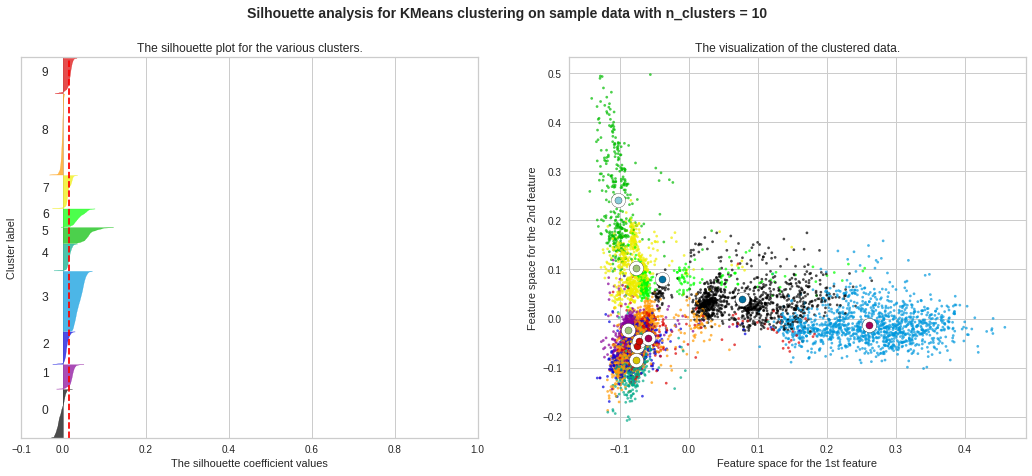

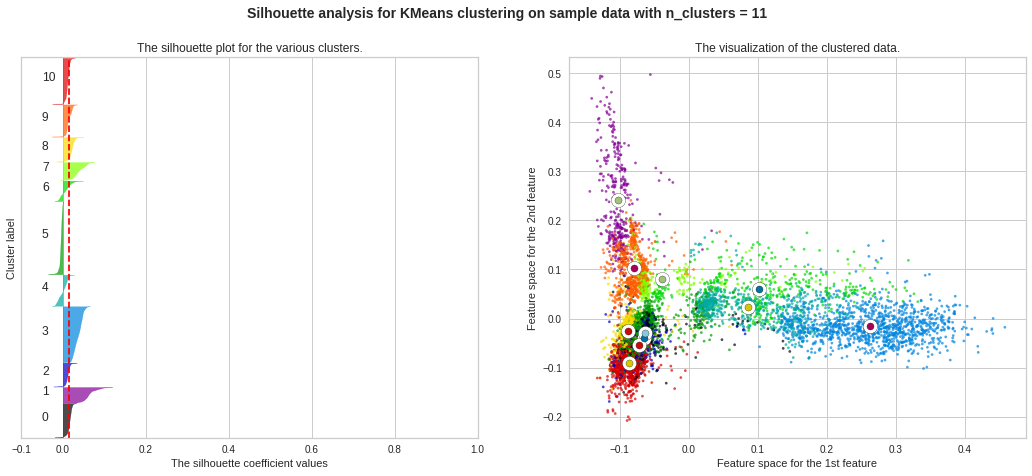

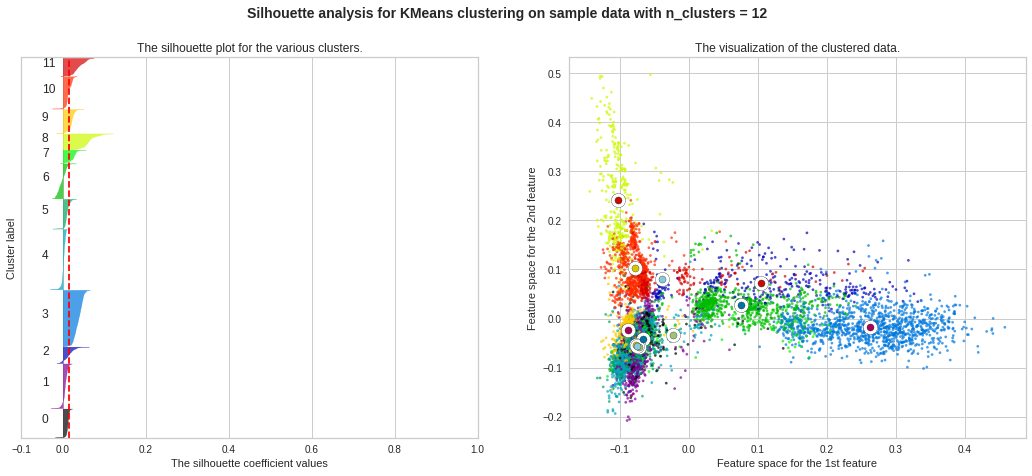

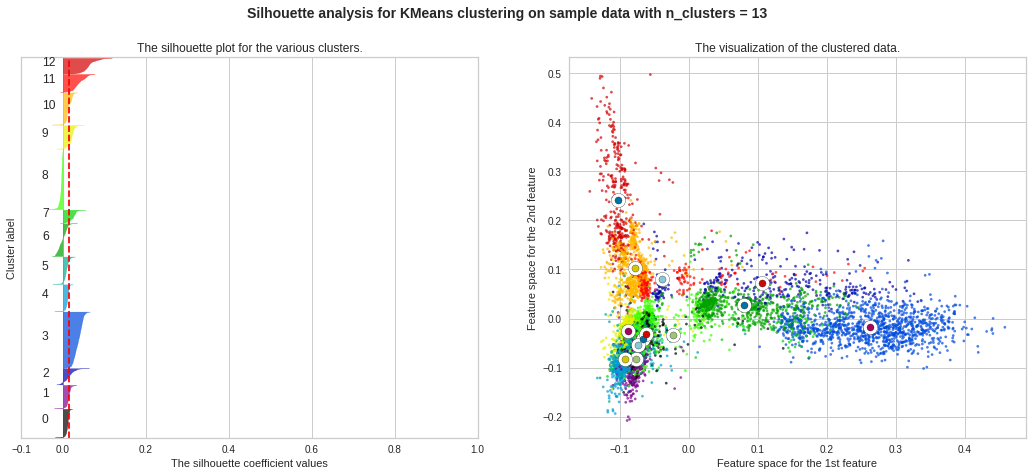

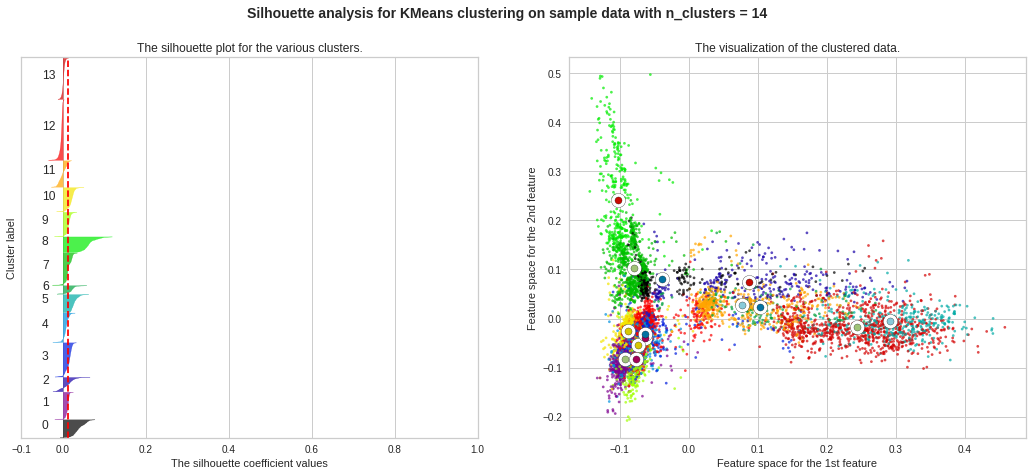

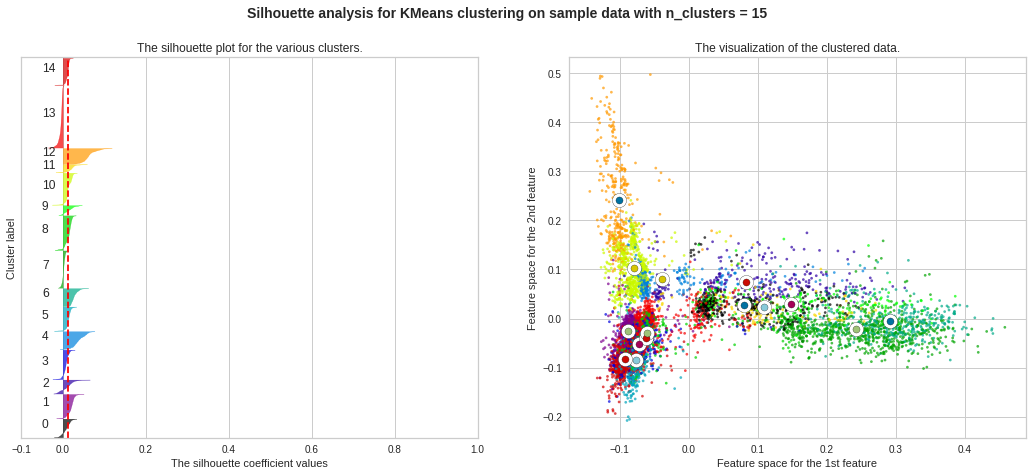

In [193]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [178]:
from sklearn.metrics import silhouette_score, silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

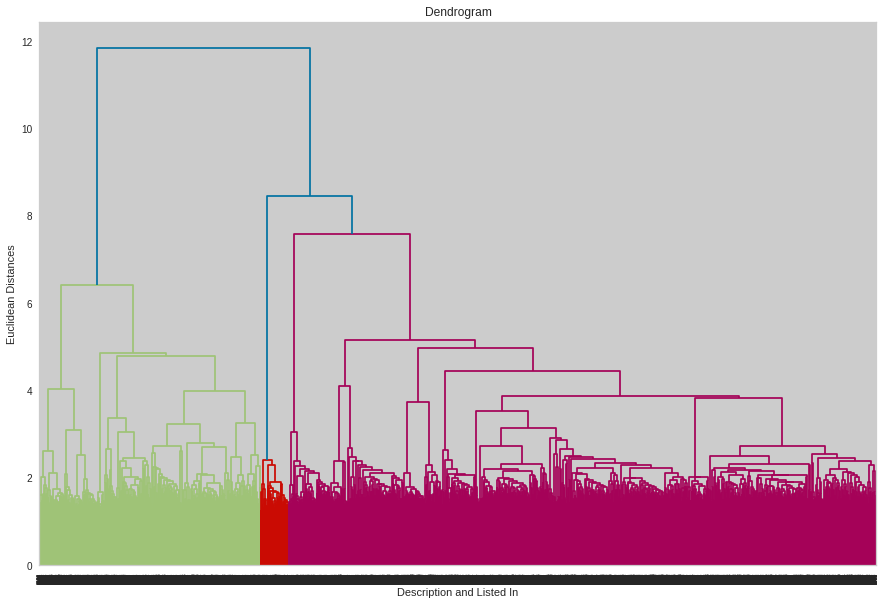

In [197]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Description and Listed In')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

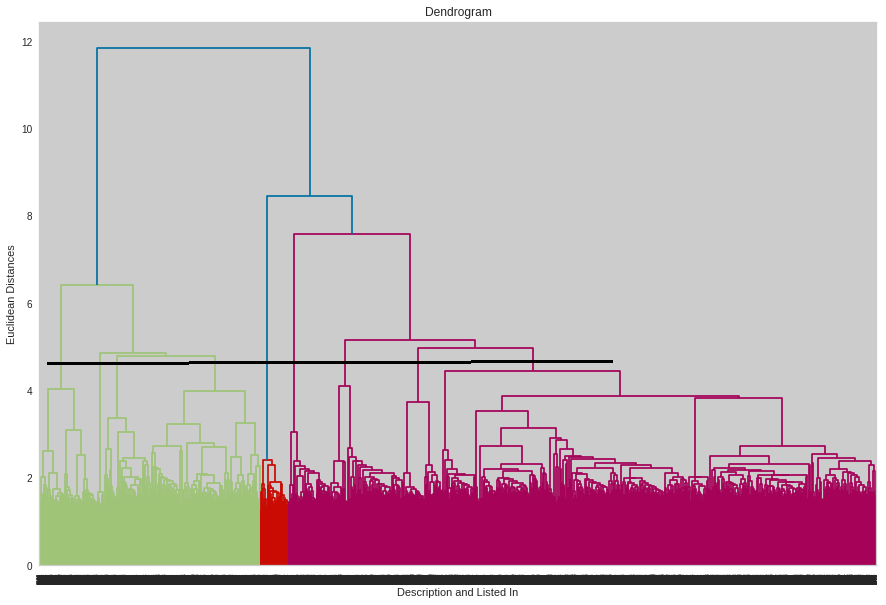

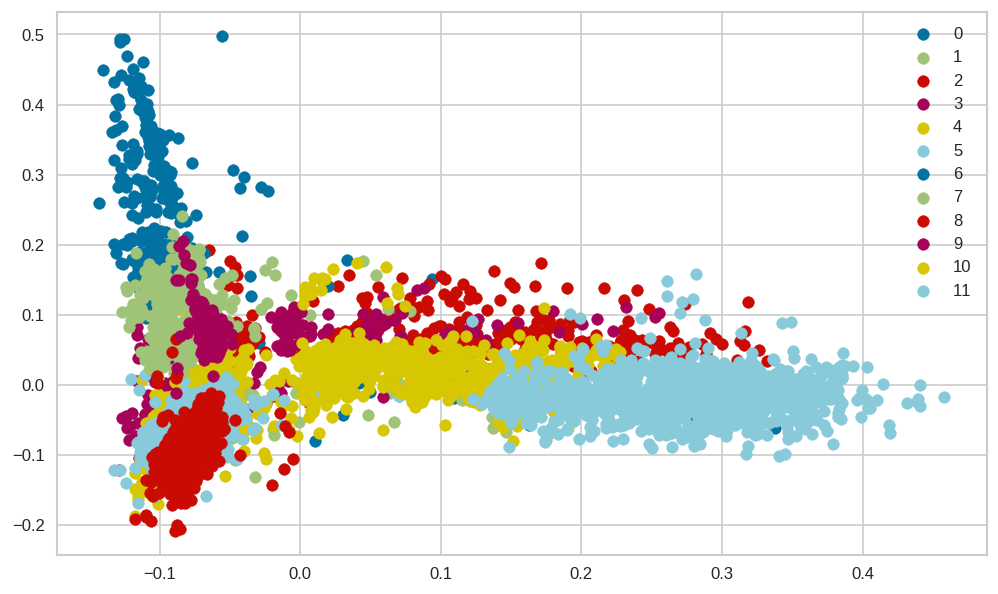

In [199]:

plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=12, init= 'k-means++', random_state=9)
kmeans.fit(X)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()